<a href="https://colab.research.google.com/github/ufuomaibude/GLOBAL_FOOD_LOSS/blob/main/Food_Loss_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Loss & Waste

### Load libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# New Section

In [ ]:
df = pd.read_excel('/content/Food loss Data.xlsx')  #read the excel file

### Data preprocessing

In [ ]:
df.info() #sourced from Measurement and Reduction of Food Loss and Waste by Food and Agriculture Organisation of the United Nations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25416 entries, 0 to 25415
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  25416 non-null  int64  
 1   country                   25416 non-null  object 
 2   region                    1214 non-null   object 
 3   cpc_code                  25416 non-null  object 
 4   commodity                 25416 non-null  object 
 5   year                      25416 non-null  int64  
 6   loss_percentage           25416 non-null  float64
 7   loss_percentage_original  25416 non-null  object 
 8   loss_quantity             539 non-null    object 
 9   activity                  22608 non-null  object 
 10  food_supply_stage         22025 non-null  object 
 11  treatment                 1320 non-null   object 
 12  cause_of_loss             1002 non-null   object 
 13  sample_size               1192 non-null   object 
 14  method

In [ ]:
df.head() #get the first 5 rows of the dataset

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,23161.02,"Rice, milled",2015,1.78,0.0178,26.12kgs,Storage,Storage,"30 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
1,104,Myanmar,NaN,23161.02,"Rice, milled",2015,11.77,0.1177,88.18kgs,Storage,Storage,"60 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
2,104,Myanmar,NaN,23161.02,"Rice, milled",2015,5.88,0.0588,44.09kgs,Storage,Storage,"30 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
3,104,Myanmar,NaN,23161.02,"Rice, milled",2015,3.57,0.0357,52.24kgs,Storage,Storage,"60 days storage, with trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically
4,104,Myanmar,NaN,23161.02,"Rice, milled",2015,17.65,0.1765,132.27kgs,Storage,Storage,"90 days storage, no trapping",Rodents,NaN,Controlled Experiment,"Dr Steven Belmain (2015), context post-harvest...",NaN,Reference has been generated automatically


In [ ]:
df.drop(['region', 'loss_quantity', 'treatment', 'cause_of_loss', 'sample_size', 'reference', 'url', 'notes'], axis=1, inplace=True, errors='ignore')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25416 entries, 0 to 25415
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   m49_code                  25416 non-null  int64  
 1   country                   25416 non-null  object 
 2   cpc_code                  25416 non-null  object 
 3   commodity                 25416 non-null  object 
 4   year                      25416 non-null  int64  
 5   loss_percentage           25416 non-null  float64
 6   loss_percentage_original  25416 non-null  object 
 7   activity                  22608 non-null  object 
 8   food_supply_stage         22025 non-null  object 
 9   method_data_collection    25061 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.9+ MB


In [ ]:
df

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,"Rice, milled",2015,1.78000,0.0178,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,"Rice, milled",2015,11.77000,0.1177,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,"Rice, milled",2015,5.88000,0.0588,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,"Rice, milled",2015,3.57000,0.0357,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,"Rice, milled",2015,17.65000,0.1765,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.50000,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.50000,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.38075,2.38075,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.44008,3.44008,"Drying, Harvesting",Harvest,Modelled Estimates


In [ ]:
df2 =df.replace('Rice, milled','Rice')
df2

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.78000,0.0178,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.77000,0.1177,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.88000,0.0588,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.57000,0.0357,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.65000,0.1765,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.50000,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.50000,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.38075,2.38075,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.44008,3.44008,"Drying, Harvesting",Harvest,Modelled Estimates


In [ ]:
df3 = df2.replace({
    'Maize(corn)':'Maize','Cauliflowers and broccoli':'Cruciferous vegetable'
    })
df3

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.78000,0.0178,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.77000,0.1177,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.88000,0.0588,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.57000,0.0357,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.65000,0.1765,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.50000,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.50000,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.38075,2.38075,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.44008,3.44008,"Drying, Harvesting",Harvest,Modelled Estimates


In [ ]:
df3.head(20)

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.78000,0.0178,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.77000,0.1177,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.88000,0.0588,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.57000,0.0357,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.65000,0.1765,Storage,Storage,Controlled Experiment
5,104,Myanmar,23161.02,Rice,2015,5.35000,0.0535,Storage,Storage,Controlled Experiment
6,108,Burundi,111,Wheat,2021,4.43333,4.43333,"Drying, Harvesting",Harvest,Modelled Estimates
7,108,Burundi,111,Wheat,2021,4.86667,4.86667,Storage,Farm,Modelled Estimates
8,108,Burundi,111,Wheat,2021,3.50000,3.5,"Shelling, Threshing",NaN,Modelled Estimates
9,108,Burundi,111,Wheat,2021,2.50000,2.5,Transportation,Farm,Modelled Estimates


In [ ]:
df2.to_excel('Food.xlsx', index=False)  #rename values on dataset

In [ ]:
df4 = df3.replace({'Beans, dry':'Beans','Other fruits, n.e.c.':'Other fruit',
'Edible roots and tubers with high starch or inulin content, n.e.c., fresh':'Edible roots and tubers',
'Chillies and peppers, dry (<i>Capsicum</i> spp., <i>Pimenta</i> spp.':'Pepper','Pepper (<i>Piper</i> spp.':'Pepper',
'Cucumbers and gherkins':'Cucumber','Pomelos and grapefruits':'Grapefruits',
'Peaches and nectarines':'Stone fruits','Sweet corn, prepared or preserved':'Sweet corn','Sweet corn, frozen':'Sweet corn',
'Plums, dried':'Plums','Lettuce and chicory':'Lettuce',
'Cantaloupes and other melons':'Other melons','Chillies and peppers, green (<i>Capsicum</i> spp. and <i>Pimenta</i> spp.)':'Pepper',
'Chillies and peppers, dry (<i>Capsicum</i> spp., <i>Pimenta</i> spp.), raw':'Pepper',
'Pumpkins, squash and gourds':'Cucurbita','Other beans, green':'Other beans','Mangoes, guavas and mangosteens':'Mangoes',
'Tangerines, mandarins, clementines':'Tangerines',
'Plums and sloes':'Plums','Sugar and syrups n.e.c.':'Sugar and Syrups','Onions and shallots, green':'Onions',
'Eggplants(aubergines)':'Eggplants','Mushrooms and truffles':'Mushrooms',
'Hen eggs in shell, fresh':'Hen eggs in shell'})


In [ ]:
df4

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.78000,0.0178,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.77000,0.1177,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.88000,0.0588,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.57000,0.0357,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.65000,0.1765,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.50000,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.50000,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.38075,2.38075,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.44008,3.44008,"Drying, Harvesting",Harvest,Modelled Estimates


In [ ]:
#save new pandas sheet to excel file
df4.to_excel('Foodlosscleaned.xlsx', index=False)

##import already cleaned data from excel for further preprocessing

In [ ]:
df_cleaned = pd.read_excel('/content/Foodlosscleaned.xlsx')  #read the excel file

In [ ]:
df_cleaned

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.78000,0.0178,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.77000,0.1177,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.88000,0.0588,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.57000,0.0357,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.65000,0.1765,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.50000,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.50000,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.38075,2.38075,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.44008,3.44008,"Drying, Harvesting",Harvest,Modelled Estimates


In [ ]:
df_cleaned['loss_percentage'] = df_cleaned['loss_percentage'].round(1)

In [ ]:
df_cleaned

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.8,0.0178,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.8,0.1177,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.9,0.0588,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.6,0.0357,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.6,0.1765,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.5,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.5,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.4,2.38075,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.4,3.44008,"Drying, Harvesting",Harvest,Modelled Estimates


In [ ]:
df_cleaned['loss_percentage_original']=df_cleaned['loss_percentage_original'].round(2)

In [ ]:
df_cleaned

,m49_code,country,cpc_code,commodity,year,loss_percentage,loss_percentage_original,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.8,0.0178,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.8,0.1177,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.9,0.0588,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.6,0.0357,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.6,0.1765,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.5,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.5,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.4,2.38075,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.4,3.44008,"Drying, Harvesting",Harvest,Modelled Estimates


In [ ]:
print(df_cleaned)

       m49_code  country  cpc_code commodity  year  loss_percentage  \
0           104  Myanmar  23161.02      Rice  2015              1.8   
1           104  Myanmar  23161.02      Rice  2015             11.8   
2           104  Myanmar  23161.02      Rice  2015              5.9   
3           104  Myanmar  23161.02      Rice  2015              3.6   
4           104  Myanmar  23161.02      Rice  2015             17.6   
...         ...      ...       ...       ...   ...              ...   
25411       894   Zambia       118    Millet  2000              2.5   
25412       894   Zambia       118    Millet  2000              2.5   
25413       894   Zambia       118    Millet  2000              2.4   
25414       894   Zambia       118    Millet  2000              3.4   
25415       894   Zambia       118    Millet  2000              1.3   

      loss_percentage_original            activity food_supply_stage  \
0                       0.0178             Storage           Storage   
1  

In [ ]:
df_cleaned1 = df_cleaned.drop(columns= 'loss_percentage_original', axis=1)


In [ ]:
df_cleaned1

,m49_code,country,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.8,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.8,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.9,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.6,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.6,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.4,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.4,"Drying, Harvesting",Harvest,Modelled Estimates


In [ ]:
#check for duplicate values

In [ ]:
print("This is the total number of duplicated rows in the dataset")
display(sum(df_cleaned1.duplicated()))

This is the total number of duplicated rows in the dataset


566

In [ ]:
df_cleaned2 = df_cleaned1.drop_duplicates()
#Check if there are still duplicates
print("Be sure there are no duplicated rows")
df_cleaned2.shape

Be sure there are no duplicated rows


(24850, 9)

In [ ]:
df_cleaned2.head(10)

,m49_code,country,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.8,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.8,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.9,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.6,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.6,Storage,Storage,Controlled Experiment
5,104,Myanmar,23161.02,Rice,2015,5.4,Storage,Storage,Controlled Experiment
6,108,Burundi,111,Wheat,2021,4.4,"Drying, Harvesting",Harvest,Modelled Estimates
7,108,Burundi,111,Wheat,2021,4.9,Storage,Farm,Modelled Estimates
8,108,Burundi,111,Wheat,2021,3.5,"Shelling, Threshing",NaN,Modelled Estimates
9,108,Burundi,111,Wheat,2021,2.5,Transportation,Farm,Modelled Estimates


In [ ]:
df_cleaned2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 0 to 25415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   m49_code                24850 non-null  int64  
 1   country                 24850 non-null  object 
 2   cpc_code                24850 non-null  object 
 3   commodity               24850 non-null  object 
 4   year                    24850 non-null  int64  
 5   loss_percentage         24850 non-null  float64
 6   activity                22244 non-null  object 
 7   food_supply_stage       21459 non-null  object 
 8   method_data_collection  24497 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB


In [ ]:
df_cleaned2

,m49_code,country,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.8,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.8,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.9,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.6,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.6,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.4,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.4,"Drying, Harvesting",Harvest,Modelled Estimates


In [ ]:
df_cleaned2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
m49_code,24850.0,480.732958,258.751724,2.0,270.0,466.0,710.0,894.0
year,24850.0,2010.628934,6.055179,2000.0,2006.0,2011.0,2016.0,2022.0
loss_percentage,24850.0,4.220777,5.794952,0.0,1.5,2.6,4.4,65.0


In [ ]:
df_cleaned2.to_excel('Foodwastecleaned.xlsx', index=False)

In [ ]:
#Clean missing values
print("These are the missing values for each attribute.")
display(df_cleaned2.isna().sum())

These are the missing values for each attribute.


,0
m49_code,0
country,0
cpc_code,0
commodity,0
year,0
loss_percentage,0
activity,2606
food_supply_stage,3391
method_data_collection,353


In [ ]:
df_cleaned3 = df_cleaned2.fillna('Not Recorded')

In [ ]:
df_cleaned3

,m49_code,country,cpc_code,commodity,year,loss_percentage,activity,food_supply_stage,method_data_collection
0,104,Myanmar,23161.02,Rice,2015,1.8,Storage,Storage,Controlled Experiment
1,104,Myanmar,23161.02,Rice,2015,11.8,Storage,Storage,Controlled Experiment
2,104,Myanmar,23161.02,Rice,2015,5.9,Storage,Storage,Controlled Experiment
3,104,Myanmar,23161.02,Rice,2015,3.6,Storage,Storage,Controlled Experiment
4,104,Myanmar,23161.02,Rice,2015,17.6,Storage,Storage,Controlled Experiment
...,...,...,...,...,...,...,...,...,...
25411,894,Zambia,118,Millet,2000,2.5,Transportation,Farm,Modelled Estimates
25412,894,Zambia,118,Millet,2000,2.5,Winnowing,Farm,Modelled Estimates
25413,894,Zambia,118,Millet,2000,2.4,Storage,Storage,Modelled Estimates
25414,894,Zambia,118,Millet,2000,3.4,"Drying, Harvesting",Harvest,Modelled Estimates


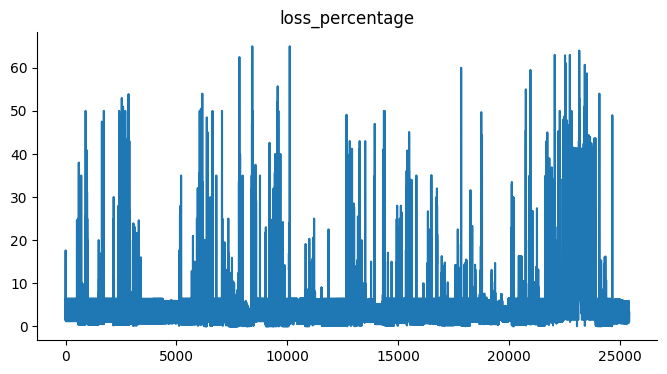

In [ ]:
# @title loss_percentage

from matplotlib import pyplot as plt
df_cleaned3['loss_percentage'].plot(kind='line', figsize=(8, 4), title='loss_percentage')
plt.gca().spines[['top', 'right']].set_visible(False)

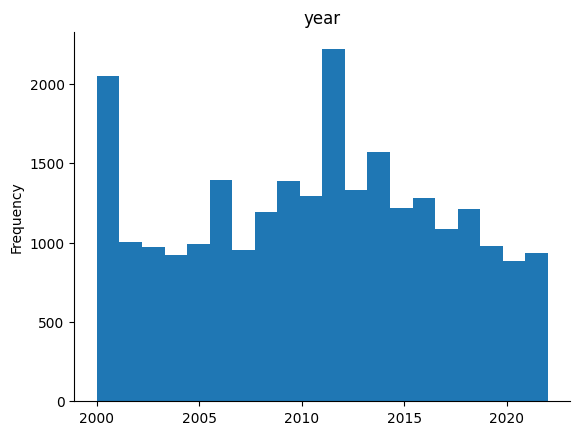

In [ ]:
# @title year

from matplotlib import pyplot as plt
df_cleaned3['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

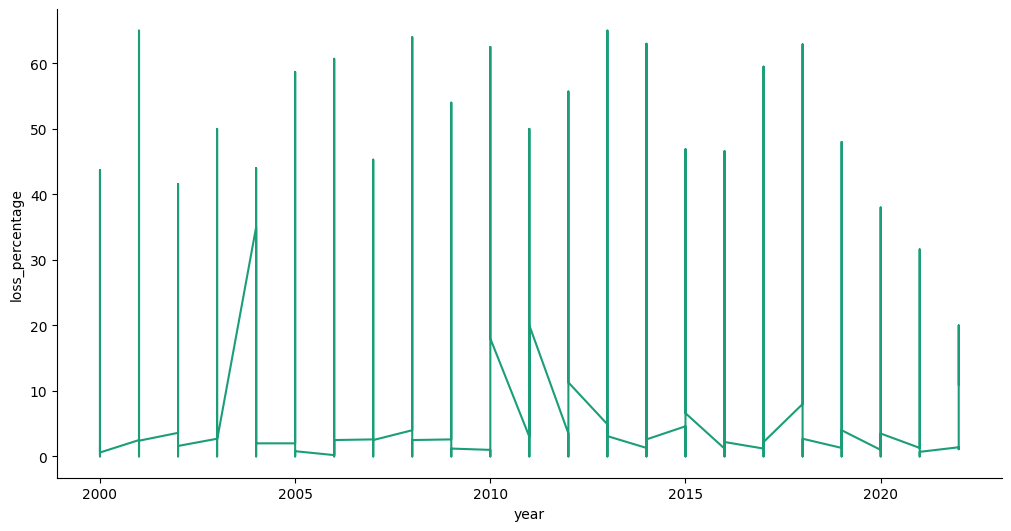

In [ ]:
# @title year vs loss_percentage

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['loss_percentage']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_cleaned3.sort_values('year', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('loss_percentage')

In [ ]:
df_cleaned3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 0 to 25415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   m49_code                24850 non-null  int64  
 1   country                 24850 non-null  object 
 2   cpc_code                24850 non-null  object 
 3   commodity               24850 non-null  object 
 4   year                    24850 non-null  int64  
 5   loss_percentage         24850 non-null  float64
 6   activity                24850 non-null  object 
 7   food_supply_stage       24850 non-null  object 
 8   method_data_collection  24850 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.9+ MB
